# Read data and create plots

Read data from csv files created for housing affordability. Create the plots and ranking



In [15]:
import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [16]:

mainfile = os.path.join("..","Project1_AmazonSites.xlsx")
# read places 
xls = pd.ExcelFile(mainfile) 
places_df=xls.parse('AmazonCities', dtype=str) 


## Housing Data

data from Census API

In [17]:
# Housing data from Census

housingfile = os.path.join("Results","housing.csv")
housing_df = pd.read_csv(housingfile)
housing_df = housing_df.merge(places_df,on='NAME')
housing_df

,Unnamed: 0,Homeowner Vacancy Rate,Income,Median Mortgage Cost,Median gross rent,Median home value,NAME,Population,Rental Vacancy Rate,home owner afford,rent afford,City,State,Latitude,Longitude,PlaceCode,StateCode
0,0,2000.0,72935.0,1539.0,1362.0,506100.0,"Washington city, District of Columbia",659009.0,10256.0,0.253212,0.224090,Washington DC,DC,38.9047,-77.0164,50000,11
1,1,19855.0,55191.0,1362.0,1294.0,508900.0,"New York city, New York",8461961.0,76655.0,0.296135,0.281350,New York,NY,40.76149,-73.9814,51000,36
2,2,1136.0,58516.0,1518.0,1369.0,423200.0,"Boston city, Massachusetts",658279.0,5576.0,0.311299,0.280744,Boston,MA,42.35843,-71.0598,07000,25
3,3,13417.0,50434.0,1138.0,987.0,225200.0,"Chicago city, Illinois",2714017.0,40067.0,0.270770,0.234842,Chicago,IL,41.85003,-87.6501,14000,17
4,4,5401.0,51538.0,1410.0,1241.0,496300.0,"Los Angeles city, California",3918872.0,30057.0,0.328301,0.288952,Los Angeles,CA,34.05223,-118.244,44000,06
5,5,1606.0,58641.0,1081.0,966.0,218200.0,"Raleigh city, North Carolina",441326.0,5241.0,0.221210,0.197677,Raleigh,NC,35.7721,-78.6386,55000,37
6,6,1872.0,60939.0,1215.0,1106.0,257800.0,"Austin city, Texas",907779.0,11621.0,0.239256,0.217792,Austin,TX,30.26715,-97.7431,05000,48
7,7,2735.0,49398.0,1112.0,998.0,222300.0,"Atlanta city, Georgia",456378.0,9829.0,0.270132,0.242439,Atlanta,GA,33.749,-84.388,04000,13


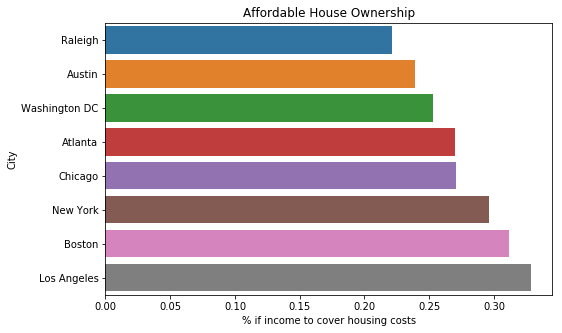

In [18]:

plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('home owner afford')
sns.barplot(y='City',x='home owner afford',data=housing_df)
plt.xlabel("% if income to cover housing costs")

plt.title("Affordable House Ownership")

housingplot = os.path.join("Plots",'affordhouse.png')
plt.savefig(housingplot)
plt.show()


In [19]:
ranking_own = pd.DataFrame(housing_df['City'])
#ranking_own=ranking_own.rename(columns={'City':'Housing Owner Affordability'})
ranking_own
ranking= ranking_own
ordered = np.arange(8,0,-1)
ordered
ranking['own'] = ordered 

        

In [20]:
ranking = ranking.set_index('City')

In [21]:
ranking

,own
City,
Raleigh,8
Austin,7
Washington DC,6
Atlanta,5
Chicago,4
New York,3
Boston,2
Los Angeles,1


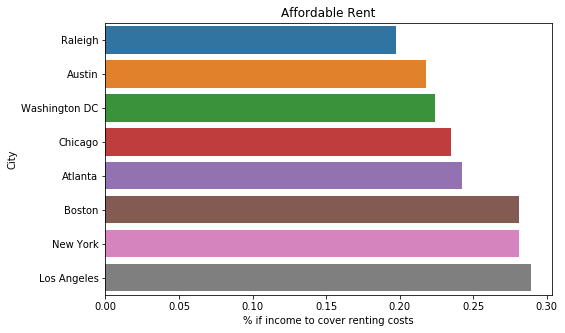

In [22]:
plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('rent afford')
sns.barplot(y='City',x='rent afford',data=housing_df)
plt.xlabel("% if income to cover renting costs")
plt.title("Affordable Rent")
rentplot = os.path.join("Plots","affordrent.png")
plt.savefig(rentplot)
plt.show()

In [23]:
ranking_rent = pd.DataFrame(housing_df['City'])
ranking_rent['rent']=ordered
r = ranking_rent.set_index('City')

ranking['rent']=r['rent']
ranking

,own,rent
City,,
Raleigh,8,8
Austin,7,7
Washington DC,6,6
Atlanta,5,4
Chicago,4,5
New York,3,2
Boston,2,3
Los Angeles,1,1


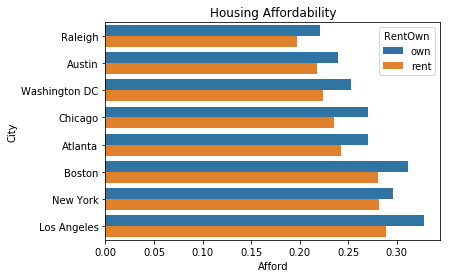

In [24]:
# combined plot
housing_df_temp_own = housing_df.copy()
housing_df_temp_rent = housing_df.copy()
housing_df_temp_own['RentOwn'] = 'own'
housing_df_temp_own['Afford'] = housing_df_temp_own['home owner afford']
housing_df_temp_rent['RentOwn'] = 'rent'
housing_df_temp_rent['Afford'] = housing_df_temp_own['rent afford']
frames= [housing_df_temp_own, housing_df_temp_rent]
housing_df_rentOwn = pd.concat(frames, ignore_index= 'True')#By City
sns.barplot(x="Afford", y="City", hue="RentOwn", data=housing_df_rentOwn)
plt.title("Housing Affordability")
plt.show()

In [27]:
house_rent_ranking_file = os.path.join("Results","house_rent_ranking.csv")
ranking.to_csv(house_rent_ranking_file)